In [1]:
from __future__ import print_function
from f4klib2 import *
import seaborn as sns
movs = loadMovids()
movs_length = loadLengths()

In [36]:
movid = movs[5]
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid)

# CNN

In [78]:
import lutorpy as lua

require('nn')
require('image')
#torch.setdefaulttensortype('torch.FloatTensor')
torch.setdefaulttensortype('torch.DoubleTensor')
dofile('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/lua/models/visualise.lua')
model = torch.load('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/lua/models/float/N_SGD.model.net')
fmodel = model._double()

print(fmodel)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> output]
  (1): nn.SpatialConvolutionMM(3 -> 64, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolutionMM(64 -> 64, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(30976)
  (8): nn.Dropout(0.500000)
  (9): nn.Linear(30976 -> 128)
  (10): nn.ReLU
  (11): nn.Linear(128 -> 10)
  (12): nn.LogSoftMax
}


In [95]:
xn = np.random.randn(3,100,100)
xt = torch.fromNumpyArray(xn)
yt = fmodel._forward(xt)
yn = yt.asNumpyArray()
print(xn.dtype)
print(yn)

float64
[-1.85953848e+01 -1.43007023e+01 -2.51682067e+01 -2.49441705e+01
 -2.26968580e+01 -2.91196002e-04 -1.18789271e+01 -8.16824496e+00
 -2.68276276e+01 -1.63501899e+01]


In [79]:
neighbourhood = image.gaussian1D(13)
normalization = nn.SpatialContrastiveNormalization(1, neighbourhood, 1)._float()

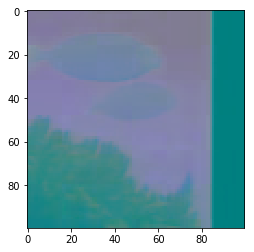

In [164]:
picker =177
image1=clip[picker]
thiscontour = getContour(contour[picker])
mask = np.full(image1.shape, 0, dtype=np.uint8)
cv2.fillPoly(mask, np.int32([thiscontour]), (255,)*3)
image2 = cv2.cvtColor(image1,cv2.COLOR_RGB2YUV)
image3 = copy.deepcopy(image2).astype(float)
image3[:,:,0] = normalizeRGB(image2)[:,:,0]
plt.imshow(image3)
plt.show()

In [207]:
xn = image3
print(xn.dtype)
# HWN->NHW   #luasucks#
xn2 = np.transpose(xn,(2,0,1))

xt = torch.fromNumpyArray(xn2)
yt = fmodel._forward(xt)
yn = yt.asNumpyArray()
print(yn)

float64
[ -7581.14970825  -1447.76120953 -14892.86318182      0.
  -4581.0867503   -5690.83831117  -2588.7935077   -5915.98193783
  -6933.56343215  -7982.88077433]


# PCA
---

In [2]:
ranges = loadRange()
pca = loadPCA(ranges)

In [3]:
component = pca.components_
eigens = pca.explained_variance_
eigenratio = pca.explained_variance_ratio_

In [4]:
for i in range(len(eigens)):
    if np.sum(eigenratio[:i+1]) > 0.90:
        print(i)
        break

88


In [5]:
print(np.sum(eigenratio>0.01))

15


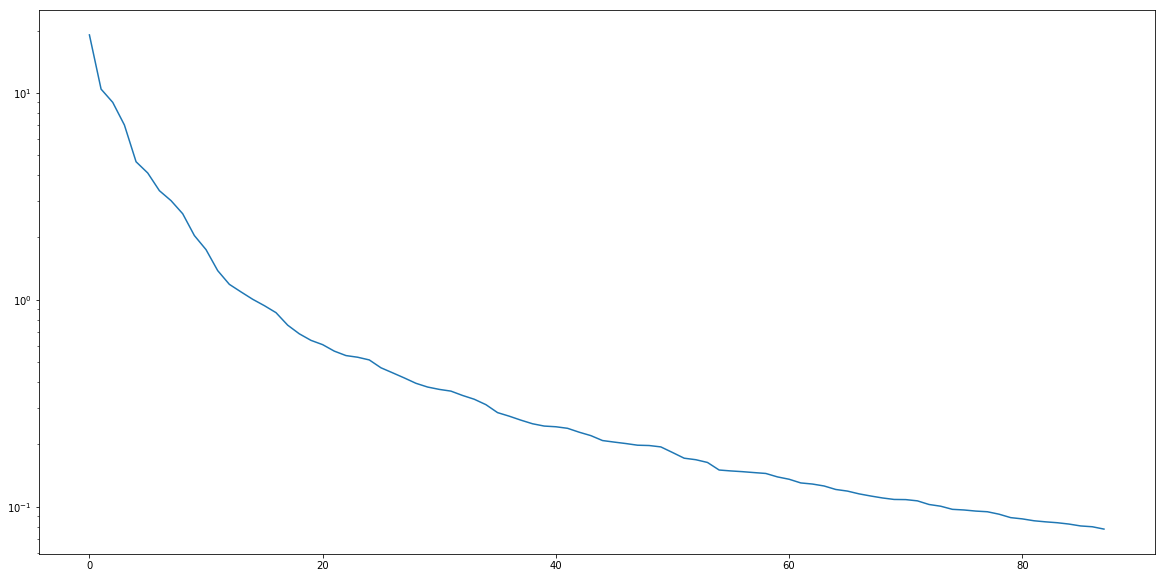

In [6]:
plt.figure(figsize=(20,10))
plt.plot(eigenratio[:88]*100)
ax = plt.gca()
ax.set_yscale("log")
plt.show()

In [7]:
feature_names = featureNames()
component = component[:50,:]
pt = np.max(np.abs(component),0)
ptall = np.max(np.abs(component))
throw = pt < (ptall*0.01)
throwindex = np.arange(0,2655)[throw]
throwfeature = np.array(feature_names)[throw]

fr = np.vstack((pt/ptall,feature_names))

print(len(throwindex))
print(fr[:,2631:2635])
#print(throwindex+1)
#print(throwfeature)

762
[['0.00427090682512' '0.00053754073893' '0.000105159648332'
  '7.57590810223e-05']
 ['Erraticity 1' 'Erraticity 2' 'Erraticity 3' 'Erraticity 4']]


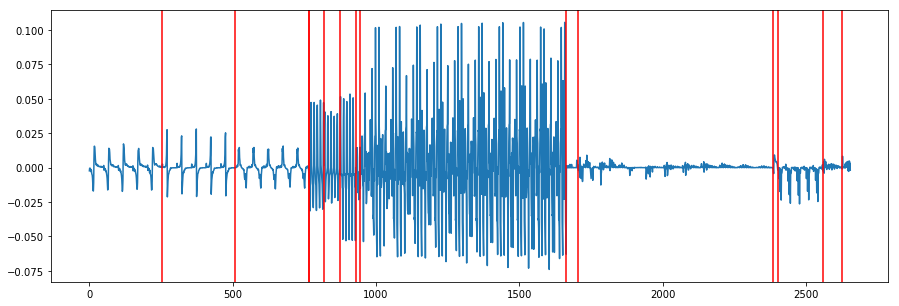

In [8]:
head = 0
end = 1
plt.subplots(end-head,1,figsize=(15,(end-head)*5))
for i in np.arange(head,end):
    plt.subplot(end-head,1,i-head+1)
    plt.plot(component[i])
    plt.axvline(x=254.5,color="red")
    plt.axvline(x=509.5,color="red")
    plt.axvline(x=764.5,color="red")
    plt.axvline(x=764.5,color="red")
    plt.axvline(x=819.5,color="red")
    plt.axvline(x=874.5,color="red")
    plt.axvline(x=929.5,color="red")
    plt.axvline(x=943.5,color="red")
    plt.axvline(x=1663.5,color="red")
    plt.axvline(x=1705.5,color="red")
    plt.axvline(x=2385.5,color="red")
    plt.axvline(x=2400.5,color="red")
    plt.axvline(x=2560.5,color="red")
    plt.axvline(x=2625.5,color="red")
plt.show()

# Load Dataset
---

In [22]:
features,targets = loadTrainDataSet(includeNew=True)
print(features.shape)
print(targets.shape)
print(targets.reshape(-1,1).shape)

counts = np.histogram(targets,np.arange(0,12))[0]
for i in np.arange(1,11):
    print("Class {0}: {1}".format(i,counts[i]))

(63916, 100)
(63916,)
(63916, 1)
Class 1: 1337
Class 2: 7824
Class 3: 2996
Class 4: 1983
Class 5: 1956
Class 6: 17747
Class 7: 17087
Class 8: 10095
Class 9: 256
Class 10: 2635


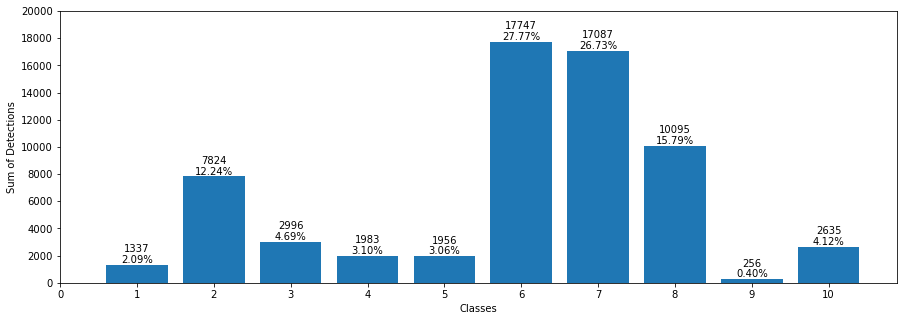

In [23]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(1,11),counts[1:11])
ax = plt.gca()
ax.set_xticks(np.arange(11))
ax.set_xlabel("Classes")
ax.set_ylabel("Sum of Detections")
ax.set_yticks(np.arange(0,22000,2000))

rects = ax.patches
labels = ["{0:.2f}%".format(counts[i+1]*100.0/sum(counts)) for i in xrange(len(rects))]
labels2 = [str(counts[i+1]) for i in xrange(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
for rect, label in zip(rects, labels2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 800, label, ha='center', va='bottom')
plt.show()

In [11]:
X = features[:,:10]
y = targets.astype('int') 

# SVM
---

[ 0.41773093  0.45003956  0.47373347  0.509999    0.56942124  0.63545496
  0.69701033  0.72402629  0.63429847  0.47964418  0.38937869]


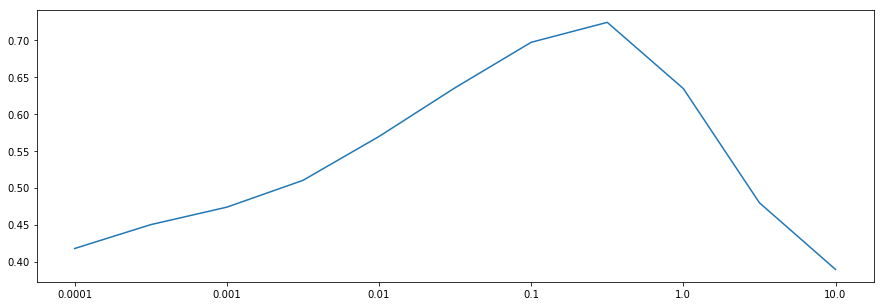

In [12]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/rbfgammascores-4:1.npy")
print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(scores,0))
plt.gca().set_xticklabels(np.insert(np.logspace(-4,1,6),0,0))
plt.show()

(10, 5, 11)
[[ 0.865  0.865  0.865  0.865  0.865  0.9    0.935  0.93   0.93   0.93
   0.93 ]
 [ 0.865  0.865  0.865  0.865  0.865  0.915  0.94   0.95   0.945  0.945
   0.945]
 [ 0.865  0.865  0.865  0.865  0.865  0.93   0.94   0.945  0.945  0.945
   0.945]
 [ 0.865  0.865  0.865  0.865  0.865  0.895  0.92   0.92   0.92   0.92
   0.92 ]
 [ 0.865  0.865  0.865  0.865  0.865  0.865  0.865  0.865  0.865  0.865
   0.865]]


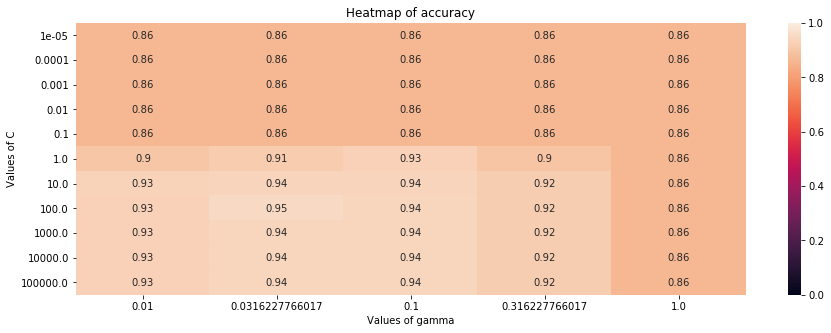

In [13]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores5gx11c.npy")
print(scores.shape)
print(np.average(scores,0))
plt.figure(figsize=(15,5))
sns.heatmap(np.average(scores,0).T,xticklabels=np.logspace(-2,0,5), yticklabels=np.logspace(-5,5,11), vmin=0., vmax=1., annot=True)
plt.xlabel("Values of gamma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 5, 6)
[[ 0.4168  0.5404  0.6231  0.6703  0.7167  0.7325]
 [ 0.447   0.5915  0.6643  0.7212  0.7401  0.736 ]
 [ 0.3627  0.5906  0.7042  0.7474  0.7478  0.7426]
 [ 0.3543  0.4763  0.7065  0.7291  0.7273  0.7268]
 [ 0.3543  0.3752  0.6124  0.6421  0.6412  0.6412]]


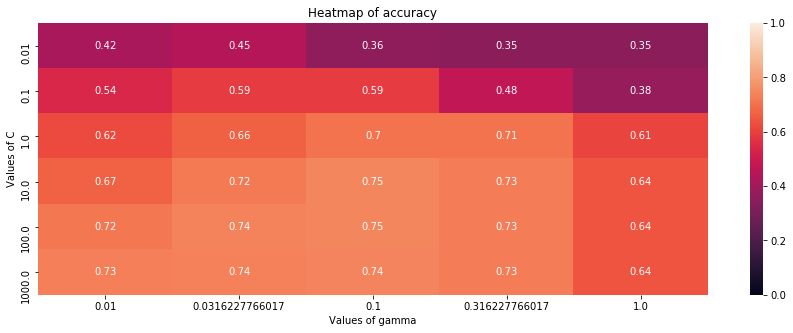

In [14]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores5gx6c1000.npy")
print(scores.shape)
print(np.average(scores,0))
plt.figure(figsize=(15,5))
sns.heatmap(np.average(scores,0).T,xticklabels=np.logspace(-2,0,5), yticklabels=np.logspace(-2,3,6), vmin=0., vmax=1., annot=True)
plt.xlabel("Values of gamma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 5, 6)
[[ 0.43002573  0.49988641  0.56942124  0.62978793  0.68219152  0.71643784]
 [ 0.46635653  0.55688224  0.63545496  0.7014398   0.73609312  0.73658161]
 [ 0.44262974  0.58653633  0.69701033  0.75035831  0.74951151  0.73838932]
 [ 0.35334107  0.51380938  0.72402629  0.75234497  0.74843669  0.74706879]
 [ 0.27064862  0.36615696  0.63429847  0.65887191  0.65848109  0.65848109]]


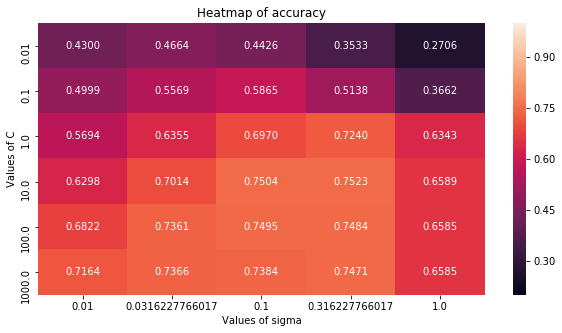

In [15]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores5gx6c.npy")
print(scores.shape)
print(np.average(scores,0))
plt.figure(figsize=(10,5))
sns.heatmap(np.average(scores,0).T,
            xticklabels=np.logspace(-2,0,5), 
            yticklabels=np.logspace(-2,3,6), 
            vmin=0.2, vmax=1., 
            fmt='.4f', annot=True)
plt.xlabel("Values of sigma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 10, 12)


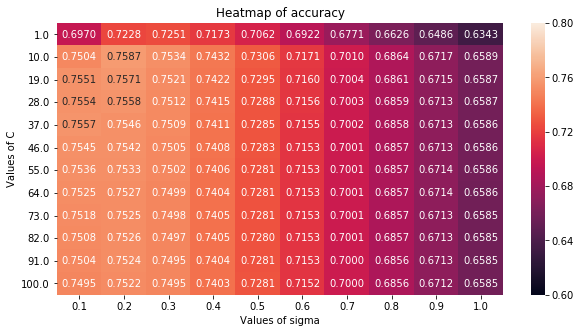

In [16]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores1011.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(10,5))
sns.heatmap(np.average(scores,0).T,
            xticklabels=np.linspace(0.1,1,10), 
            yticklabels=np.linspace(1,100,12), 
            vmin=0.6, vmax=0.8, 
            fmt='.4f', annot=True)
plt.xlabel("Values of sigma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 10, 10, 30)


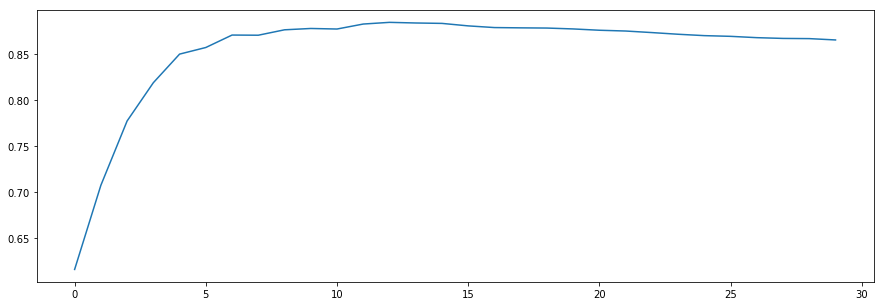

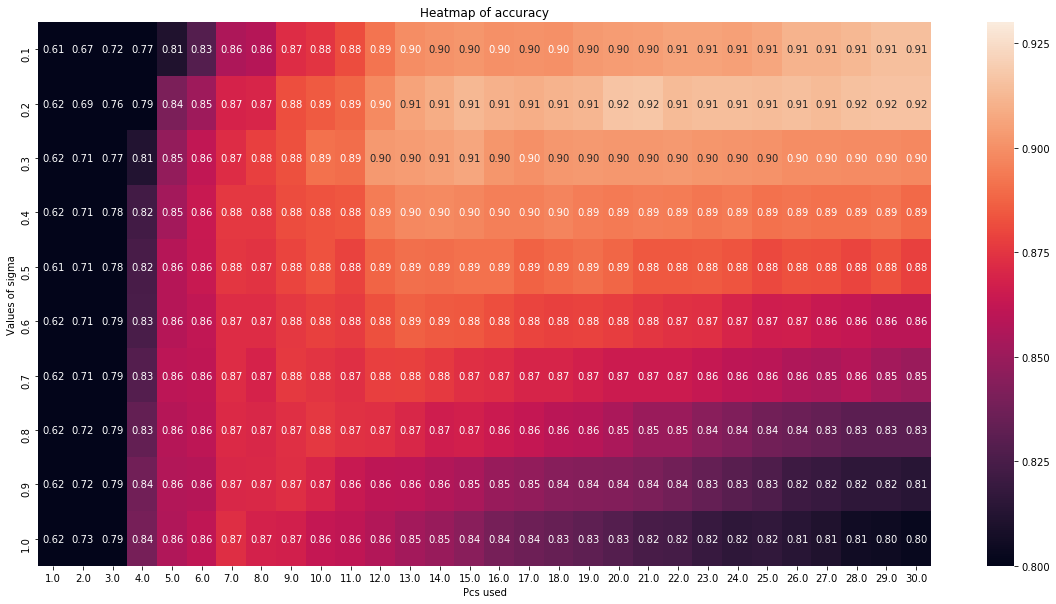

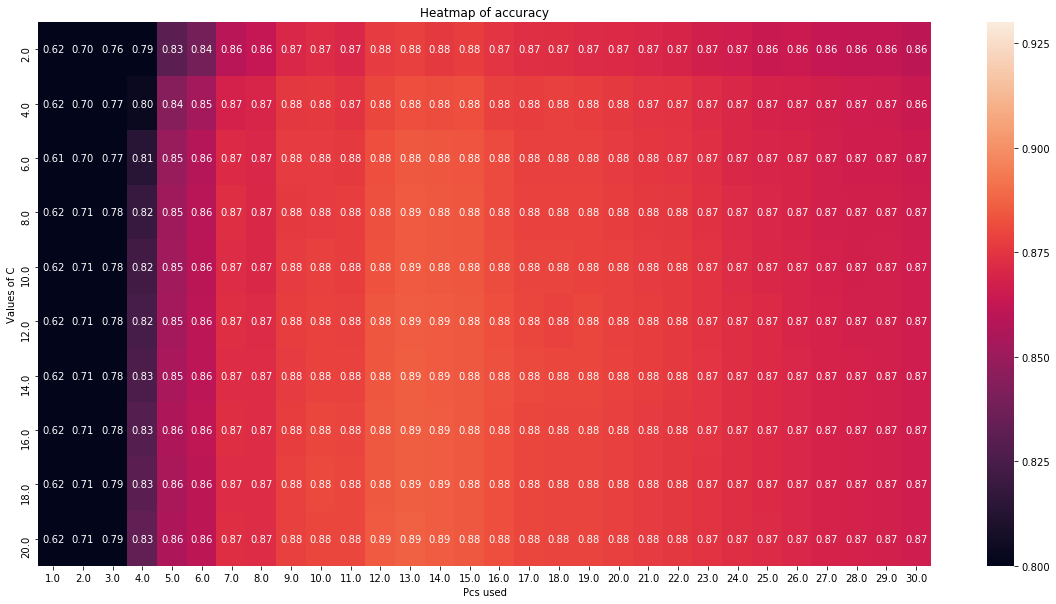

In [17]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scorespcr1.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
#plt.gca().set_xticks(np.insert(np.linspace(1,30,30),0,0))
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(np.average(np.average(scores,0),1),
            xticklabels=np.linspace(1,30,30), 
            yticklabels=np.linspace(0.1,1,10), 
            vmin=0.8, vmax=0.93, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(np.average(np.average(scores,0),0),
            xticklabels=np.linspace(1,30,30), 
            yticklabels=np.linspace(2,20,10), 
            vmin=0.8, vmax=0.93, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 3, 1, 10)


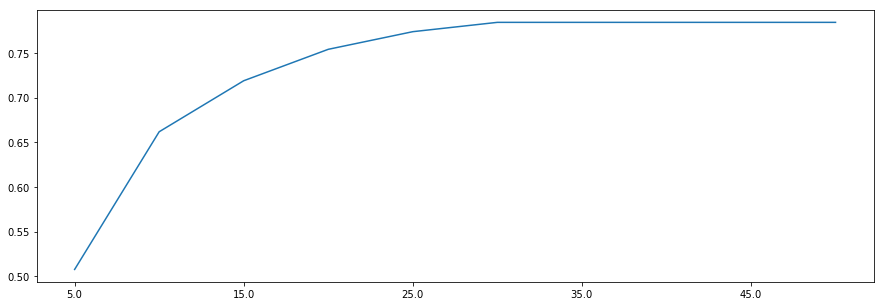

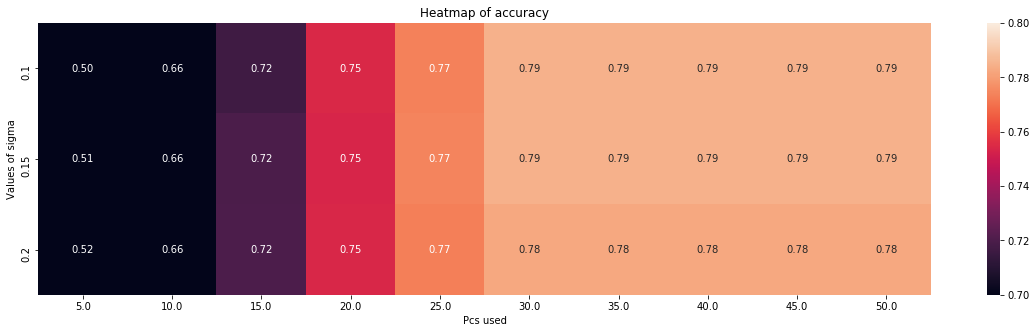

In [18]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scorespc5-50.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
plt.gca().set_xticklabels(np.insert(np.linspace(5,45,5),0,0))
plt.show()

plt.figure(figsize=(20,5))
sns.heatmap(np.average(np.average(scores,0),1),
            xticklabels=np.linspace(5,50,10), 
            yticklabels=np.linspace(0.1,0.2,3), 
            vmin=0.7, vmax=0.8, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()

(10, 3, 1, 11)


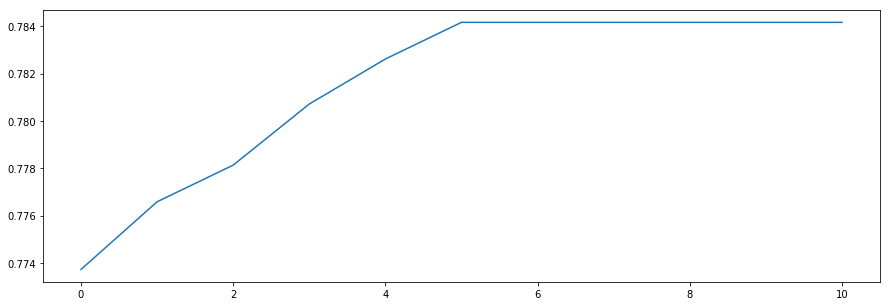

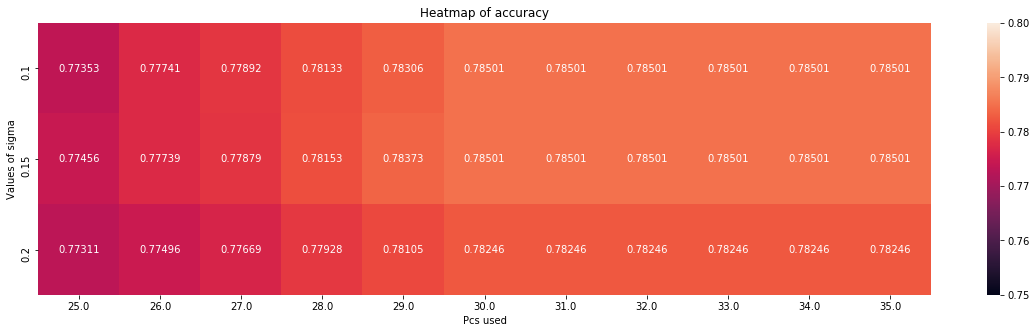

In [19]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scorespc25-35.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
#plt.gca().set_xticklabels(np.insert(np.linspace(5,35,16),0,0))
plt.show()

plt.figure(figsize=(20,5))
sns.heatmap(np.average(np.average(scores,0),1),
            xticklabels=np.linspace(25,35,11), 
            yticklabels=np.linspace(0.1,0.2,3), 
            vmin=0.75, vmax=0.8, 
            fmt='.5f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 26, 1, 1)


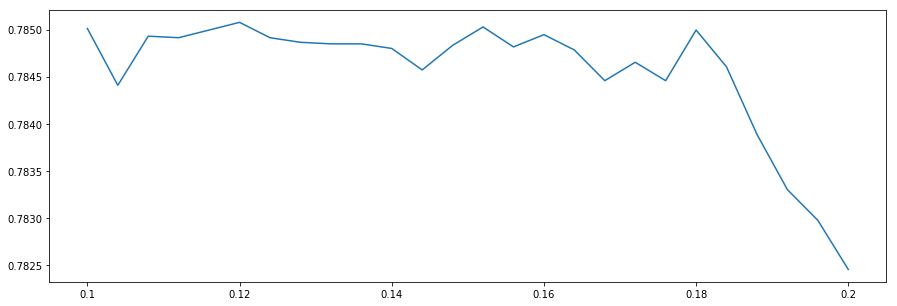

In [20]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scoresgammad.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),1),1))
plt.gca().set_xticklabels(np.insert(np.linspace(0.1,0.2,6),0,0))
plt.show()
plt.show()
plt.show()